In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
class Kernel:
    def __init__(self, n) -> None:
        self.n = n #number of points

    def GaussianRbf(self, sig): # kernel exponentiel

        # code pas optimisé du tout,
        g_kern = np.zeros((self.n, self.n))
        for t in range(self.n):
            for s in range(self.n):
                g_kern[t, s] = np.exp(-np.power(t-s, 2)/(2*sig**2))

        return g_kern

In [53]:
n = 1000
K = Kernel(n).GaussianRbf(sig=0.01)
L = np.linalg.cholesky(K)
# simulate stochastic process with covariance K
eps_ = np.dot(L, np.random.randn(n))  

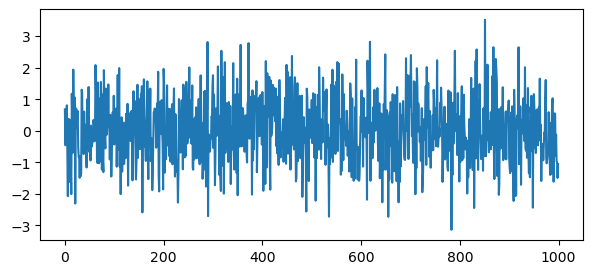

In [58]:
# processus iid
plt.figure(figsize=(7, 3))
K = Kernel(n).GaussianRbf(sig=0.01)
L = np.linalg.cholesky(K)
# simulate stochastic process with covariance K
eps_ = np.dot(L, np.random.randn(n))  
plt.plot(eps_)

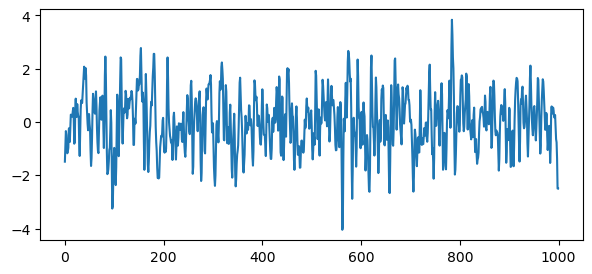

In [62]:
# processus non iid
plt.figure(figsize=(7, 3))
K = Kernel(n).GaussianRbf(sig=1.5)
L = np.linalg.cholesky(K)
# simulate stochastic process with covariance K
eps_ = np.dot(L, np.random.randn(n))  
plt.plot(eps_)

In [75]:
d = 5 # caracteristic time, (arbitrary for now, juste pour tester)
estimators = []
for offset in range(d):
    sampled_points = eps_[offset::d]  # Take points with the specified offset
    averaged_estimator = np.mean(sampled_points)  # Compute the mean of the sampled points
    estimators.append(averaged_estimator)


In [76]:
estimators

[0.04563789924784658,
 -0.03382264055313072,
 -0.06712462672843847,
 -0.003919409457408636,
 0.06549560775422186]